## Hypothesis Test for amount of sugar in cold and hot cereal

### Import Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.shape #Shape of dataframe

(77, 16)

In [12]:
# Saperate dataframe for cold cereal and hot cereal
cold_df = df.loc[df['type']=='C',]
hot_df = df.loc[df['type']=='H',]

### 1. Develop null and Alternative hypothesis
- Null Hypothesis = $H_{0}$ = Sugar in hot cereal and cold cereal are equal
- Alternative Hypothesis = $H_{a}$ =  Sugar in hot cereal and cold cereal are NOT equal

### 2. Specify the level of significance
- α = 5% or α = 0.05

### 3. Compute the value of the test statistic z/t

### Z-Test
- Find test statistic (ztest) and p value

In [14]:
#import ztest method
from statsmodels.stats.weightstats import ztest 

In [26]:
ztest, pval = ztest(cold_df['sugars'], x2=hot_df['sugars'], alternative='two-sided')

In [27]:
print(f'z-statistic:{ztest} \npvalue :{pval}')

z-statistic:2.5771174568555164 
pvalue :0.009962809013847548


### $H_{0}$ is Rejected
- As pval < 0.025 ($z_{α/2}$) and z-statistic > 1.96 (From z-distribution-table 1.96 for 2.5% and 1.68 for 5% significance level)
- There is sufficient statistical evidence to infer that Sugar in hot cereal and cold cereal are NOT equal

### Check for calories in cold and hot cereal

In [28]:
from scipy.stats import ttest_ind

In [30]:
ttest, pval = ttest_ind(cold_df['calories'], hot_df['calories'], alternative='two-sided', equal_var=False)

In [31]:
print(f't-statistic:{ttest} \npvalue :{pval}')

t-statistic:3.1070612896033047 
pvalue :0.002691710812554955


### $H_{0}$ is Rejected
- As pval < 0.025 ($z_{α/2}$) 
- There is sufficient statistical evidence to infer that Calories in hot cereal and cold cereal are NOT equal

### Visualization

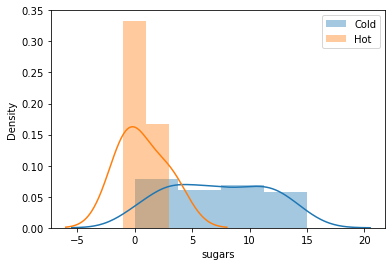

In [41]:
sns.distplot(cold_df['sugars'], label='Cold')
sns.distplot(hot_df['sugars'], label='Hot')
plt.legend()